## SCIP example

In [1]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Sheringham Shoal

In [3]:
locations = load_repository()
L = locations.sheringham
capacity = 6

In [4]:

wfn = WindFarmNetwork(L=L, cables=capacity)

<Axes: >

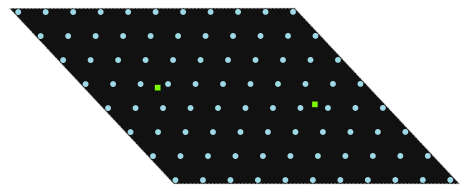

In [5]:
wfn.plot_location()

### Optimize Sheringham Shoal

Initial heuristic solution to warm-start the solver:

In [6]:
router_pre_solver = Heuristic(solver='Esau_Williams')
res_pre_solver= wfn.optimize(router=router_pre_solver)
print(wfn.length())

64814.63197919911


In [7]:
router_milp = MILP(solver_name='scip', time_limit=180, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=router_milp)

Solver <scip> is not capable of warm-starting.


>>> Using warm start: the model is initialized with the provided solution S <<<
executable, which is required for solver scip


ApplicationError: No executable found for solver 'scip'

In [ ]:
wfn.G.SolutionInfo

SolutionInfo(runtime=15.104260000000002, bound=141351.27776184087, objective=146120.97659967092, relgap=0.032642122635804904, termination='FEASIBLE')

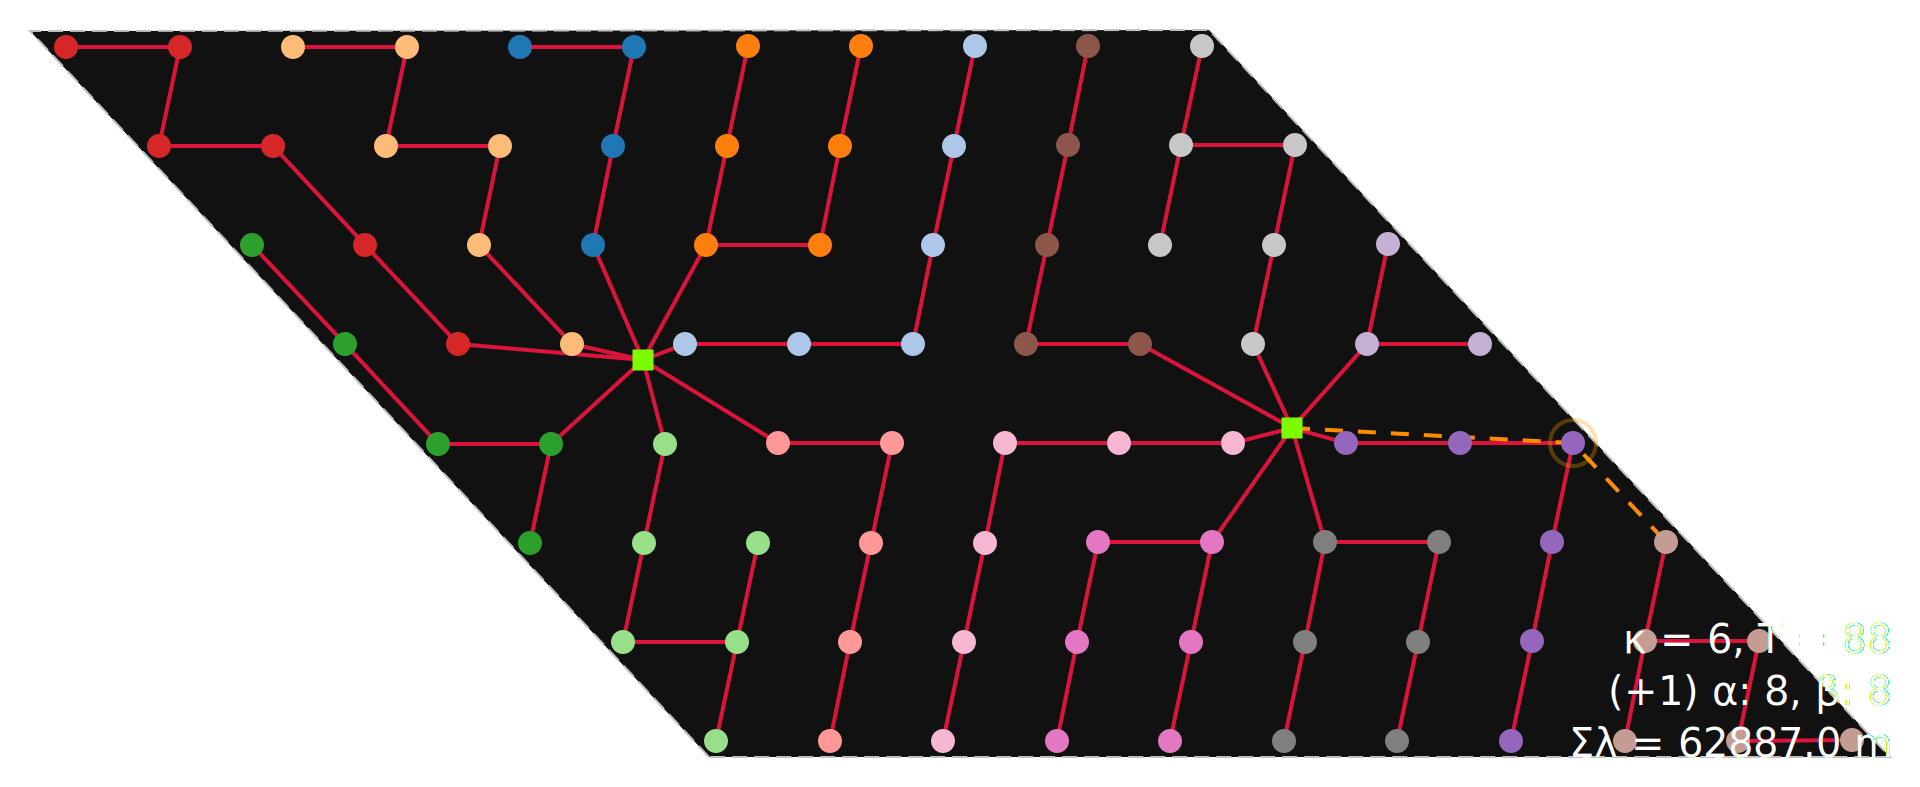

In [ ]:
wfn.length()

In [ ]:
wfn.plot()